<a href="https://colab.research.google.com/github/Zanyata/Real_estate/blob/main/Real_estate_visualisation%2Bsummary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' This is visualization and summary of code prom Real_estate_20240224 '''

#Import

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from yellowbrick.target import ClassBalance
from pandas.plotting import scatter_matrix

#CSV read

In [11]:
url = 'https://raw.githubusercontent.com/Zanyata/Real_estate/main/df_raw.csv'
df_raw = pd.read_csv(url)
df_raw = df_raw.drop(columns=['Unnamed: 0', 'url', 'location2', "price_m2"])

# Dataset is now stored in a Pandas DataFrame

In [12]:
df_raw

,price,rooms,area,location1,market
0,600000.0,3,67.65,Stare Miasto,secondary
1,359040.0,1,28.05,Psie Pole,primary
2,880147.0,3,71.10,Stare Miasto,primary
3,689000.0,3,59.00,Śródmieście,secondary
4,1149200.0,3,77.36,Stare Miasto,primary
...,...,...,...,...,...
7420,999540.0,5,84.71,Krzyki,primary
7421,595200.0,2,35.03,Śródmieście,primary
7422,898000.0,4,118.24,Krzyki,primary
7423,620000.0,3,61.20,Śródmieście,secondary


In [13]:
url = 'https://raw.githubusercontent.com/Zanyata/Real_estate/main/df_no_outl.csv'
df_no_outl = pd.read_csv(url)
df_no_outl = df_no_outl.drop(columns=['Unnamed: 0'])
# Dataset is now stored in a Pandas DataFrame

In [14]:
df_no_outl

,price,rooms,area,location1,market
0,600000.0,3,67.65,Stare Miasto,secondary
1,689000.0,3,59.00,Śródmieście,secondary
2,1149200.0,3,77.36,Stare Miasto,primary
3,455000.0,2,36.20,Śródmieście,secondary
4,1100000.0,3,64.57,Fabryczna,secondary
...,...,...,...,...,...
6178,702647.0,3,58.07,Krzyki,primary
6179,563223.0,3,51.91,Psie Pole,primary
6180,999540.0,5,84.71,Krzyki,primary
6181,595200.0,2,35.03,Śródmieście,primary


In [16]:
url = 'https://raw.githubusercontent.com/Zanyata/Real_estate/main/df_no_outl_corr.csv'
df_no_outl_corr = pd.read_csv(url)
df_no_outl_corr = df_no_outl_corr.drop(columns=['Unnamed: 0'])

# Dataset is now stored in a Pandas DataFrame

In [17]:
df_no_outl_corr

,price,rooms,area,location1,market,households_qty_per_location,rooms_per_households_qty,market_per_households_qty
0,600000.0,3,67.65,Stare Miasto,secondary,1133,0.264784,0.571050
1,689000.0,3,59.00,Śródmieście,secondary,804,0.373134,0.409204
2,1149200.0,3,77.36,Stare Miasto,primary,1133,0.264784,0.571050
3,455000.0,2,36.20,Śródmieście,secondary,804,0.248756,0.409204
4,1100000.0,3,64.57,Fabryczna,secondary,1211,0.247729,0.462428
...,...,...,...,...,...,...,...,...
6178,702647.0,3,58.07,Krzyki,primary,1802,0.166482,0.547725
6179,563223.0,3,51.91,Psie Pole,primary,1233,0.243309,0.679643
6180,999540.0,5,84.71,Krzyki,primary,1802,0.277469,0.547725
6181,595200.0,2,35.03,Śródmieście,primary,804,0.248756,0.409204


#EDA

In [ ]:
''' Let's see histograms of price and area. '''

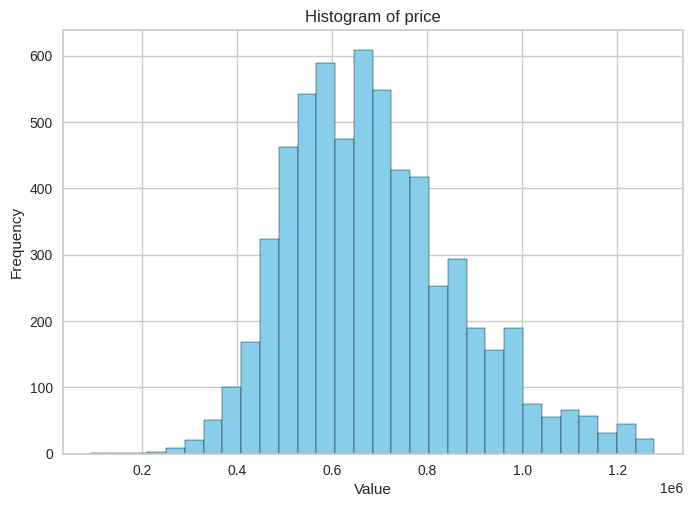

In [23]:
# Create histogram
plt.hist(df_no_outl['price'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of price')

# Show plot
plt.show()

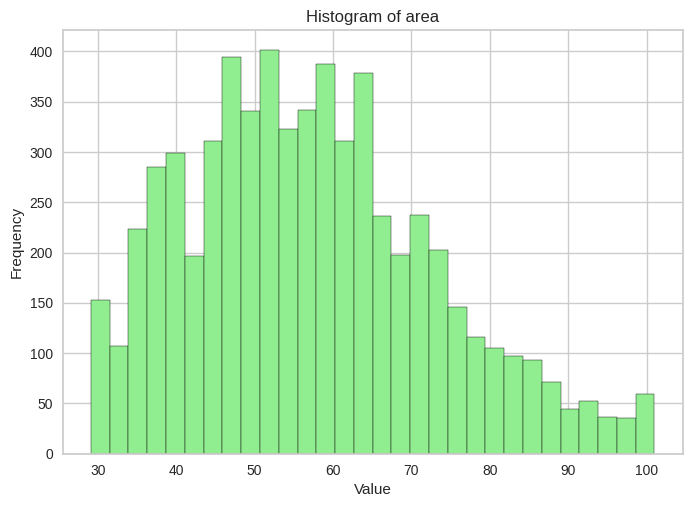

In [24]:
# Create histogram
plt.hist(df_no_outl['area'], bins=30, color='lightgreen', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of area')

# Show plot
plt.show()

In [ ]:
''' We see that both price and area are skewed, it's not a perfect normal distribution. Price is skewed towards higher values, area is skewed towards smaller values. '''

In [ ]:
''' Let's visualize rooms distribution.  '''

In [25]:
a = df_raw['rooms'].value_counts()
print(a)
print("\n")
percentage_counts = df_raw['rooms'].value_counts(normalize=True) * 100
print(percentage_counts.round(1))

3    2790
2    2456
4    1201
1     768
5     169
6      24
7      12
9       5
Name: rooms, dtype: int64


3    37.6
2    33.1
4    16.2
1    10.3
5     2.3
6     0.3
7     0.2
9     0.1
Name: rooms, dtype: float64


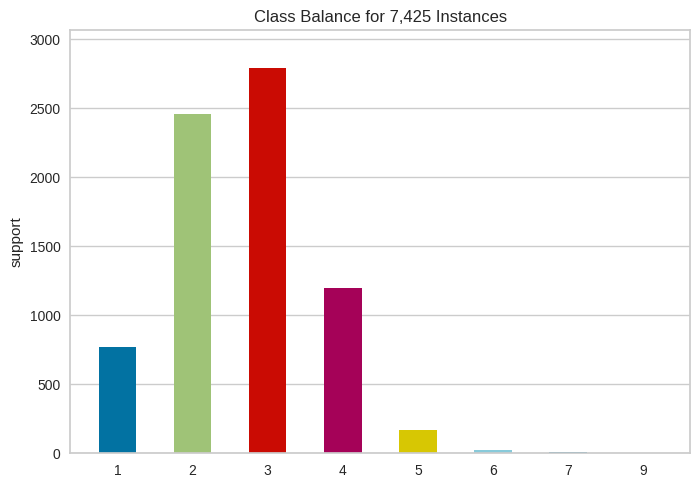

<Axes: title={'center': 'Class Balance for 7,425 Instances'}, ylabel='support'>

In [27]:
visualizer = ClassBalance()

visualizer.fit(df_raw['rooms'])
visualizer.show()

In [ ]:
''' We see that most common are flats with 2 and 3 rooms. '''

' We see that most common are flats with 2 and 3 rooms. '

In [ ]:
''' Let's visualize market distribution.  '''

In [28]:
a = df_raw['market'].value_counts()
print(a)
print("\n")
percentage_counts = df_raw['market'].value_counts(normalize=True) * 100
print(percentage_counts.round(1))

primary      3960
secondary    3465
Name: market, dtype: int64


primary      53.3
secondary    46.7
Name: market, dtype: float64


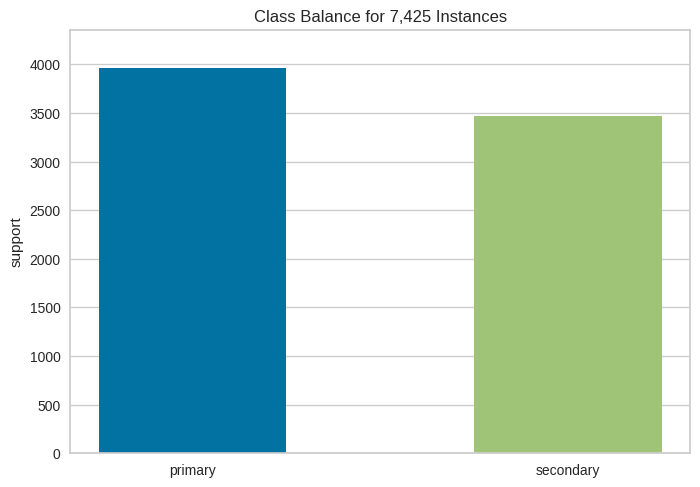

<Axes: title={'center': 'Class Balance for 7,425 Instances'}, ylabel='support'>

In [29]:
visualizer = ClassBalance()

visualizer.fit(df_raw['market'])
visualizer.show()

In [ ]:
''' We see that there is a similar representation of primary and secondary market '''

' We see that there is a similar representation of developer apartments and aftermarket '

In [ ]:
''' Let's visualize location distribution.  '''

In [30]:
a = df_raw['location1'].value_counts()
print(a)
print("\n")
percentage_counts = df_raw['location1'].value_counts(normalize=True) * 100
print(percentage_counts.round(1))

Krzyki          2163
Stare Miasto    1462
Psie Pole       1399
Fabryczna       1391
Śródmieście     1010
Name: location1, dtype: int64


Krzyki          29.1
Stare Miasto    19.7
Psie Pole       18.8
Fabryczna       18.7
Śródmieście     13.6
Name: location1, dtype: float64


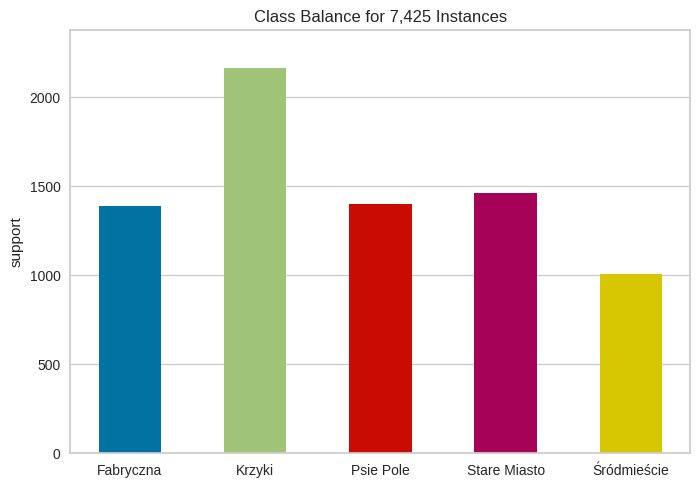

<Axes: title={'center': 'Class Balance for 7,425 Instances'}, ylabel='support'>

In [31]:
visualizer = ClassBalance()

visualizer.fit(df_raw['location1'])
visualizer.show()

In [ ]:
''' We see that from 7425 flats for all 5 districts there are at least 1k of flats categorized. '''

' We see that from 7425 flats for all 5 districts there are at least 1k of flats categorized. '

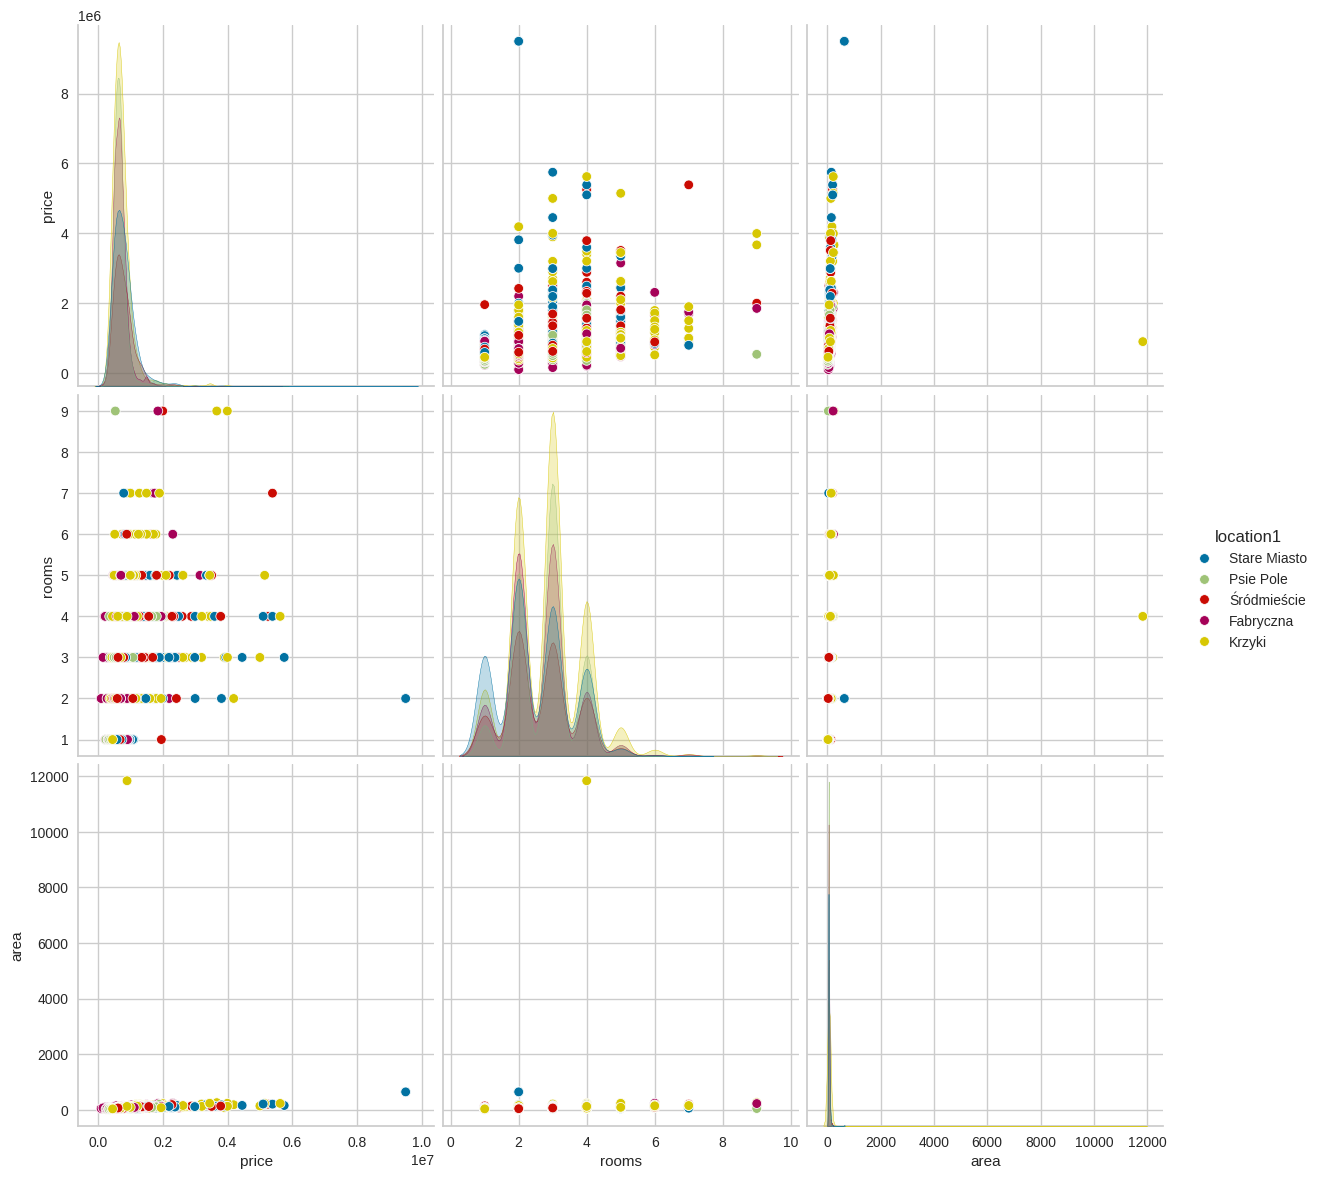

In [32]:
sns.pairplot(df_raw, hue="location1", height=4)

In [ ]:
''' There are some outliers, it needs to be addressed, models needs to have regularization. '''

' There are some outliers, it needs to be addressed, models needs to have regularization. '

In [ ]:
''' For better visualization purpose let's use df_no_outl with already removed outliers. '''

" For better visualization purpose let's remove outliers. "

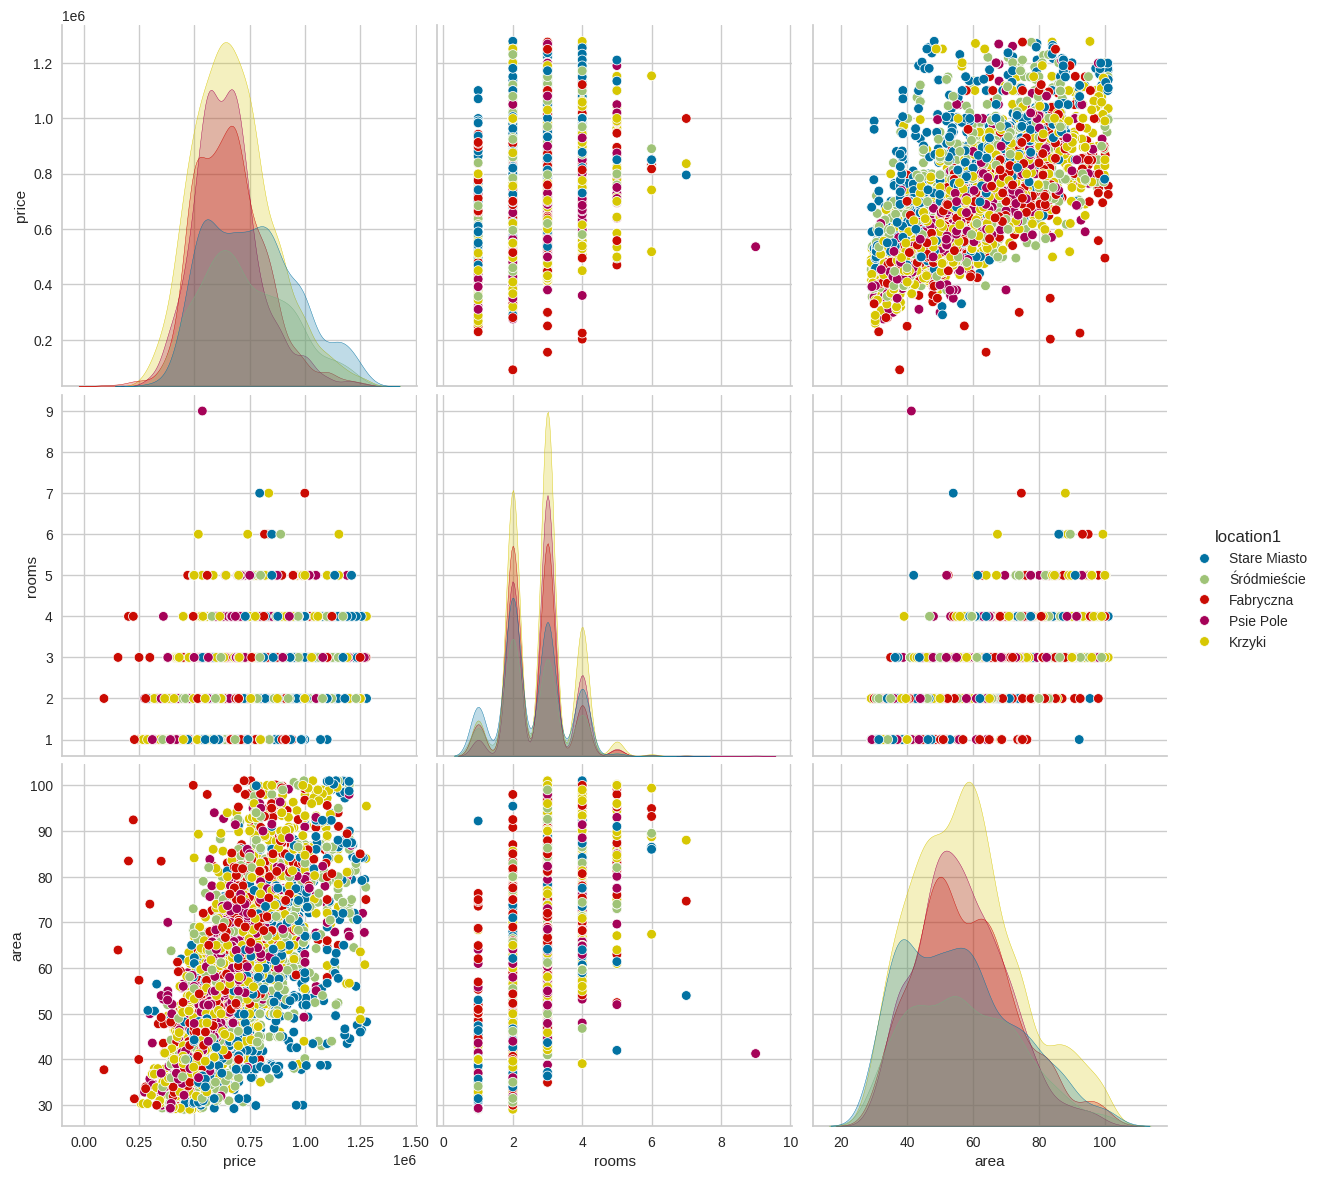

In [33]:
sns.pairplot(df_no_outl, hue="location1", height=4)

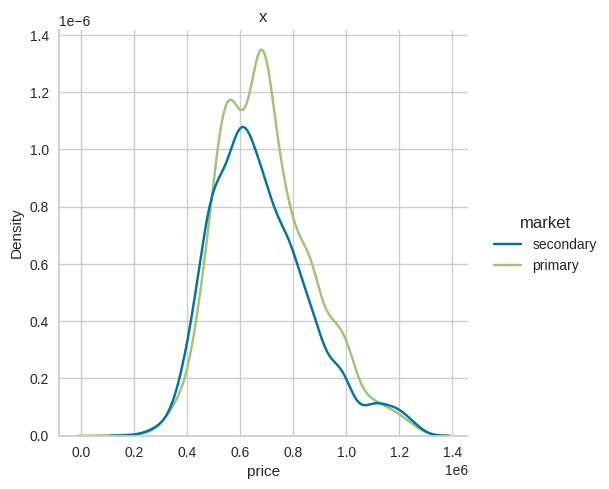

In [40]:
sns.displot(data=df_no_outl, x='price', kind='kde', hue = 'market').set(title='x')

plt.show()


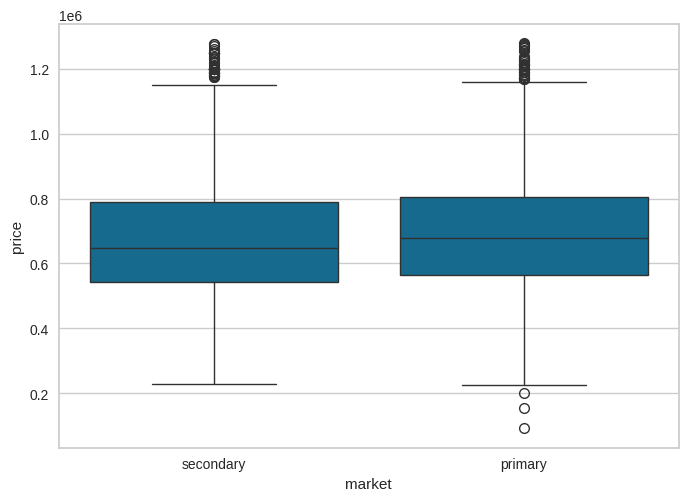

In [41]:
sns.boxplot(x="market", y="price", data=df_no_outl);

In [ ]:
''' We see primary and secondary markets don't have a substantial influence on a price.  '''

In [34]:
df_raw.corr()

<ipython-input-34-b1b9f67e3b65>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.corr()


,price,rooms,area
price,1.000000,0.452513,0.147443
rooms,0.452513,1.000000,0.144328
area,0.147443,0.144328,1.000000


In [ ]:
''' Strangely there is a higher correlation between price & rooms than price & area
Data clearly needs more investigation '''
''' Let's see on dataset with removed outliers. '''

In [35]:
df_no_outl.corr()

<ipython-input-35-6bd157293b7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_no_outl.corr()


,price,rooms,area
price,1.000000,0.539979,0.694440
rooms,0.539979,1.000000,0.759798
area,0.694440,0.759798,1.000000


In [ ]:
''' Great improvement with getting the correlation between price and area, 0.14 -> 0.68! '''

' Great improvement with getting the correlation between price and area, 0.14 -> 0.68! '

In [36]:
df_no_outl_corr.corr()

<ipython-input-36-3944ad8724df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_no_outl_corr.corr()


,price,rooms,area,households_qty_per_location,rooms_per_households_qty,market_per_households_qty
price,1.000000,0.539979,0.694440,-0.091554,0.503833,-0.065029
rooms,0.539979,1.000000,0.759798,0.088953,0.745481,0.080077
area,0.694440,0.759798,1.000000,0.031130,0.590169,-0.025358
households_qty_per_location,-0.091554,0.088953,0.031130,1.000000,-0.542111,0.276819
rooms_per_households_qty,0.503833,0.745481,0.590169,-0.542111,1.000000,-0.197443
market_per_households_qty,-0.065029,0.080077,-0.025358,0.276819,-0.197443,1.000000


In [ ]:
### PANDAS REPORT
!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [38]:
prof = ProfileReport(df_no_outl)
prof.to_file(output_file='ProfileReport_df_no_outl.html')
#file available on github

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-42-9498be2cc73d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix  = df_no_outl.corr()


<Axes: >

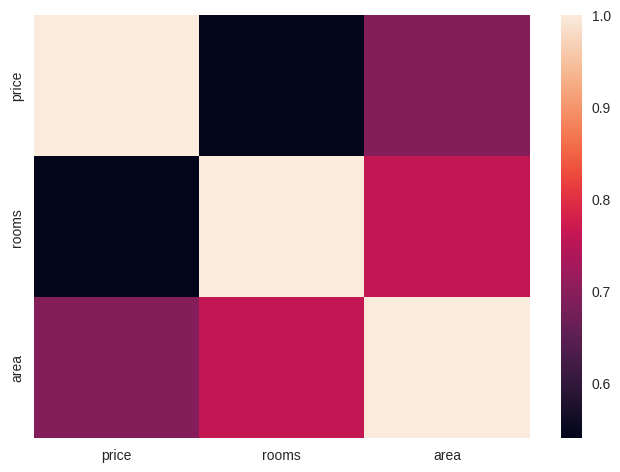

In [42]:
correlations_matrix  = df_no_outl.corr()
sns.heatmap(correlations_matrix)

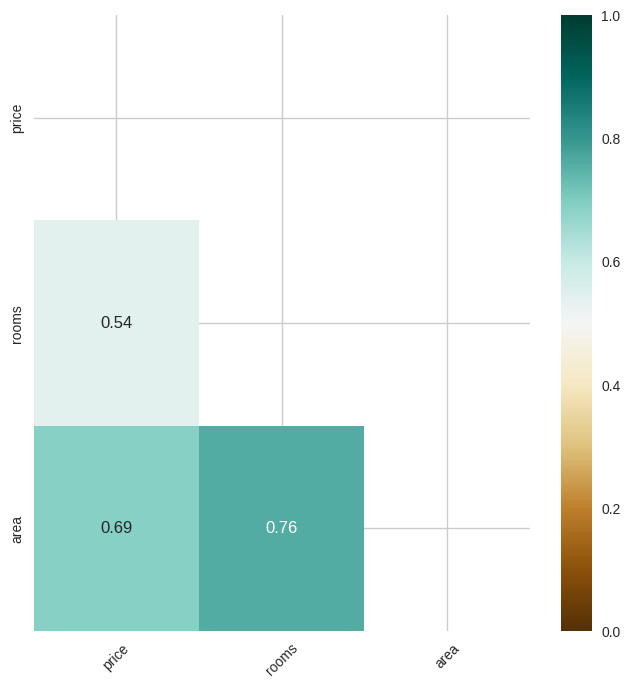

In [43]:
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(correlations_matrix, dtype=bool))
sns.heatmap(correlations_matrix.round(2), mask=mask,
            vmin=0, vmax=1,
            annot=True, cmap='BrBG')
plt.xticks(rotation=45);

<ipython-input-44-347fe7d4369f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix  = df_no_outl_corr.corr()


<Axes: >

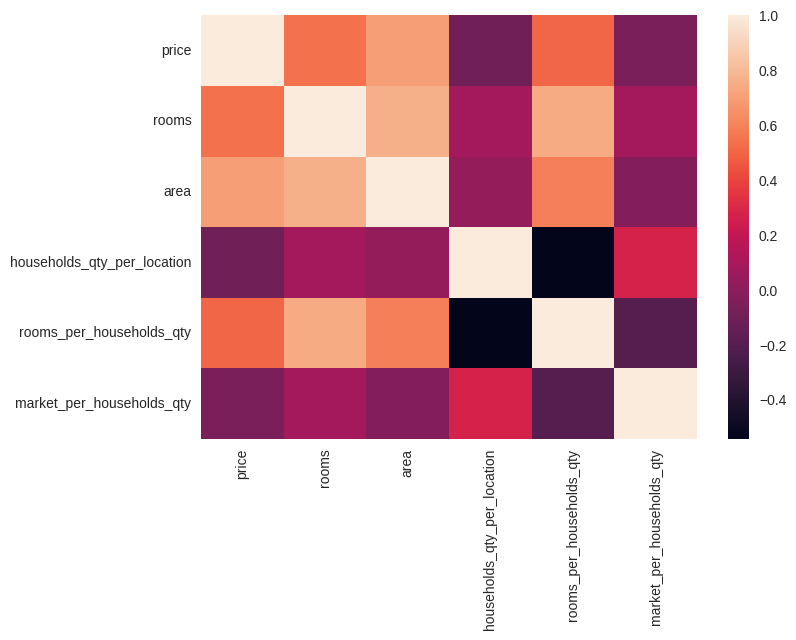

In [44]:
correlations_matrix  = df_no_outl_corr.corr()
sns.heatmap(correlations_matrix)

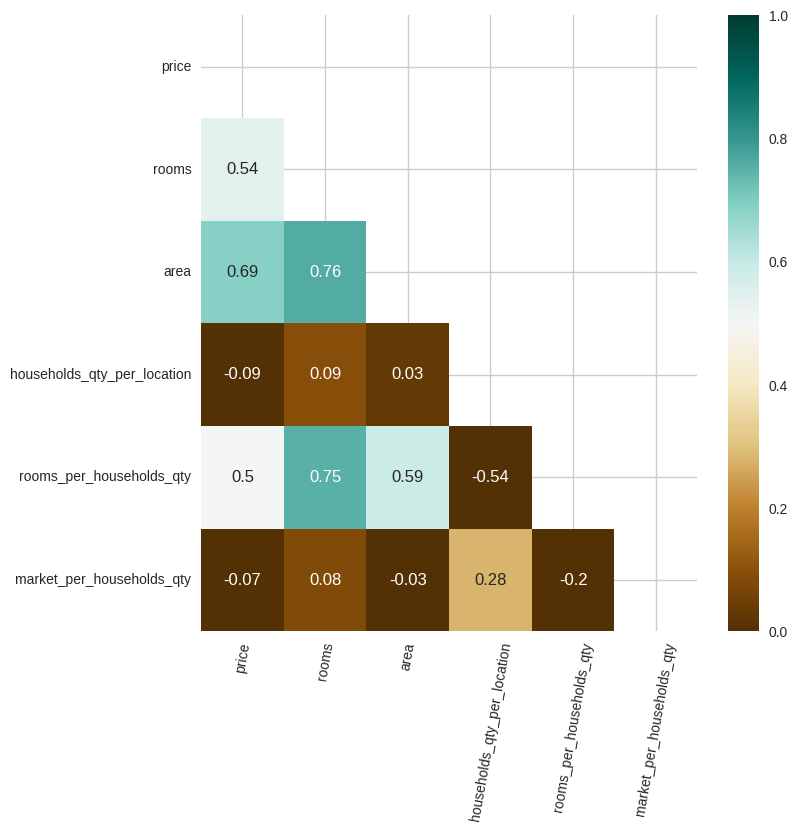

In [45]:
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(correlations_matrix, dtype=bool))
sns.heatmap(correlations_matrix.round(2), mask=mask,
            vmin=0, vmax=1,
            annot=True, cmap='BrBG')
plt.xticks(rotation=80);

In [ ]:
''' No major correlation found by attribute combination, but let's see how it will translate to model results. '''

#Loading ML models

In [ ]:
# from joblib import load

# # Load the saved model
# lr_best = load('LinearRegression(fit_intercept=False, n_jobs=-1, positive=True).joblib')

# # Now you can use lr_best_loaded for predictions


#ML models comparison

In [ ]:
summary

,RMSE,S_Deviation,Dataset
Linear Regression,305.2407765841214768,305.1978596234196743,raw
Lasso,313.1419186578839344,308.0315098312385089,raw
Ridge,304.2421923417741709,304.2081685047967881,raw
Polynomial Regression,237.3737483904251349,237.3721917246441251,raw
ElasticNet,305.6193333849655573,305.5845825363051631,raw
GBM,252.1897688895896579,252.1627470435508656,raw
XGB,238.3476223282582112,238.2736285305863078,raw
LGB,234.9882856618197025,234.9874730442546138,raw
SVR,269.9240514990663087,267.0404745635014478,raw
Decision Tree Regressor,278.9425458231288530,278.9417882379863727,raw


#Loading NN models

#NN

In [ ]:
Test Loss: 0.0297
Test RMSE: 110.2552

In [ ]:
''' We see that there's a slight improvement in the outcome using a neural network.
This might be an indication that further significant improvement of model metrics isn't possible.
Further investigation might require different attribute combinations or enriching input with more records or records with more features. '''